# Creating synthetic RM maps using radiation postprocessing data

This script focus on using the UV radiation post-processing dataset presented in [Kado-Fong et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...897..143K/abstract) to create rotation measure maps.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import yt #https://yt-project.org/

## Examining the simulation model information

In [2]:
import astro_tigress
# Need to set the master directory where the data is stored
# For Princeton users, this link would work
dir_master = "/tigress/munan/public_html/astro-tigress/"
# name of the simulation model
model_id = "R8_4pc" 
model = astro_tigress.Model(model_id,dir_master) #reading the model information

In [3]:
model.load(300, dataset="MHD_PI")

In [5]:
#we need electron density and los B field (in this case, along the z-axis)
#read in the data in the code units and reorder it to (z,y,x)
ne = model.MHD_PI.grid[('gas','ne')].value.T
Blos = model.MHD_PI.grid[('gas','magnetic_field_z')].value.T

In [6]:
#set some useful information about the simulation domain
dx_pc = model.MHD_PI.grid['dx'][0,0,0].to('pc').value
dx_cm = model.MHD_PI.grid['dx'][0,0,0].to('cm').value

xcc = model.MHD_PI.grid["x"][:,0,0].to('pc').value 
ycc = model.MHD_PI.grid["y"][0,:,0].to('pc').value
zcc = model.MHD_PI.grid["z"][0,0,:].to('pc').value

In [7]:
#calculate RM (what is the right units, BTW?)
RM = (ne*Blos*dx_pc)

In [8]:
from matplotlib.colors import LogNorm

In [9]:
plt.rcParams['figure.dpi']=200

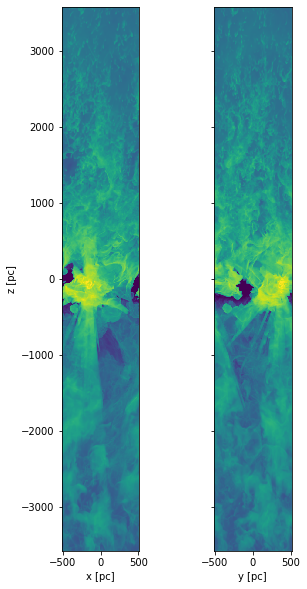

In [10]:
# example projected Ne maps
fig,axes = plt.subplots(1,2,figsize=(5,10),sharey=True)
plt.sca(axes[0])
plt.pcolormesh(xcc,zcc,(ne*dx_cm).sum(axis=1),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.ylabel('z [pc]')
axes[0].set_aspect('equal')
plt.xlabel('x [pc]')
plt.sca(axes[1])
plt.pcolormesh(ycc,zcc,(ne*dx_cm).sum(axis=2),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.xlabel('y [pc]')
axes[1].set_aspect('equal')

In [11]:
print(ne.shape)

(1792, 256, 256)


In [12]:
# construct RM maps above 1kpc
kcut = np.min(np.where(zcc>1000)[0])

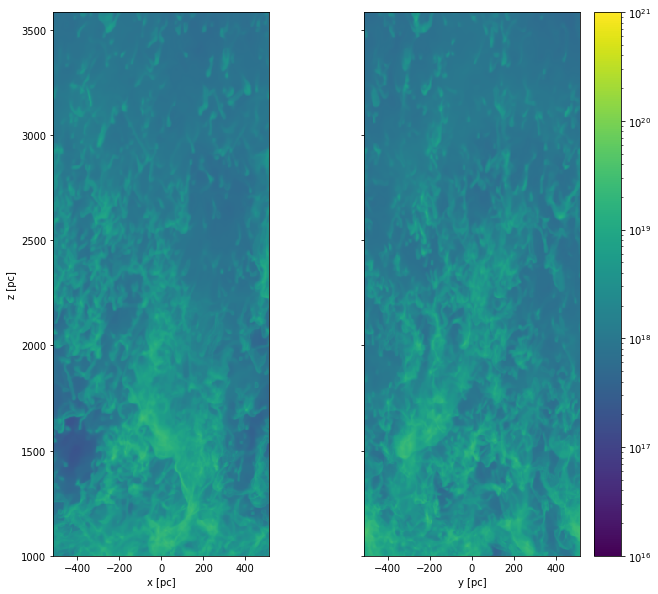

In [13]:
# example projected Ne maps
fig,axes = plt.subplots(1,2,figsize=(11,10),sharey=True)
plt.sca(axes[0])
plt.pcolormesh(xcc,zcc[kcut:],(ne[kcut:,:,:]*dx_cm).sum(axis=1),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.ylabel('z [pc]')
axes[0].set_aspect('equal')
plt.xlabel('x [pc]')
plt.sca(axes[1])
plt.pcolormesh(ycc,zcc[kcut:],(ne[kcut:,:,:]*dx_cm).sum(axis=2),norm=LogNorm(1.e16,1.e21),shading='nearest')
plt.xlabel('y [pc]')
axes[1].set_aspect('equal')
plt.colorbar()

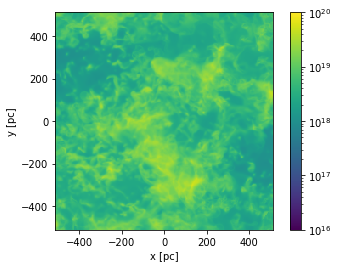

In [14]:
plt.pcolormesh(xcc,ycc,(ne*dx_cm)[kcut:,:,:].sum(axis=0),norm=LogNorm(1.e16,1.e20),shading='nearest')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')
plt.gca().set_aspect('equal')
plt.colorbar()

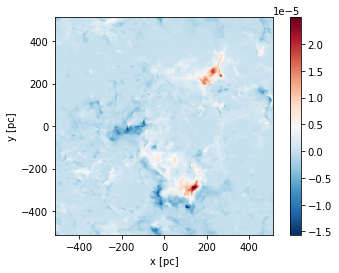

In [16]:
plt.pcolormesh(xcc,ycc,(RM)[kcut:,:,:].sum(axis=0),shading='nearest',cmap=plt.cm.RdBu_r)
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')
plt.gca().set_aspect('equal')
plt.colorbar()